# Task description
## Background
One application of Machine Learning in an eCommerce setting is to find the best products for a specific search query. Even the best algorithms, however, are not guaranteed to be optimal, in the sense that occasionaly some products chosen by the algorithm for a query may in fact be irrelevant. This may not be good for the customer experience, since the customer may wonder why irrelevant products are shown in the result page. Hence it is important to identify these products and not show them to the customers.
## Goal
The goal of this exercise is to create an algorithm that identifies these irrelevant results based on product attributes. We provide you with a small dataset containing the products returned by a black-box ML algorithm for a set of queries, together with a label describing if a product is irrelevant to the respective query. The goal of the assignment is to write an algorithm that detects these irrelevant products based on the product attributes present in the data. This algorithm could then be used to remove irrelevant products from other queries, hence improving the search experience of our customers.
## Deliverables
The result of the exercise should be this notebook containing the following sections:
* Load the data
* Short data analysis
  * Description of the data (number of queries, number of products per query, number of available attributes,...)
  * Plot of a histogram showing the number of queries with varying percentage of irrelevant products in the result set
* Algorithm implementation
* Algorithm evaluation
  * Dictionary named "query_results" containing accuracy, precision, recall and F1-score for each query as {'query1':{'accuracy':value,'precision':value,...},'query2':{...}}
  * Dictionary named "results" containing mean accuracy, precision, recall and F1-score over all queries as {'accuracy':value, 'precision':value,...}

# Load Data

In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #I
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score






In [4]:
#Load the dataset.
df = pd.read_csv ("../input/nllllpppp/data.csv")
df[0:5]

,query,price_cluster,commodity_group,product_group,silhouette,brand,color,upper_material,pattern,label
0,t-shirt dolce gabbana,low,4-2-B-01-1,shoe,backless_slipper,adidas Performance,schwarz,Kunststoff,print,1
1,t-shirt dolce gabbana,low,1-2-G-3,shoe,backless_slipper,Guess,schwarz,Kunststoff,unifarben,1
2,t-shirt dolce gabbana,low,1-2-G-4,shoe,backless_slipper,Tommy Hilfiger,rot,Leder und Textil,gestreift,1
3,t-shirt dolce gabbana,high,1-2-G-3,shoe,backless_slipper,MOSCHINO,schwarz,hochwertiges Lederimitat,unifarben,1
4,t-shirt dolce gabbana,low,1-2-C-1,shoe,low_shoe,Pier One,gelb,Textil,unifarben,1


# Data analysis

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


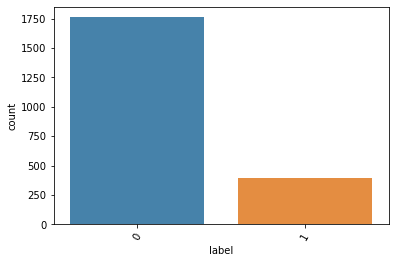

In [5]:
#Distribution of label.
sns.countplot(df['label'],label="Count",alpha=0.9)
plt.xticks(rotation=60)
plt.show()

Number of queries,

In [6]:
print('The shape of our features is:', df.shape)
df=df.replace(np.nan,0)

The shape of our features is: (2160, 10)


**Number of products per query**

In [7]:
df_prod_query=df.groupby(['query',"product_group"],as_index=False).agg({'label':pd.Series.count})
df_prod_query

,query,product_group,label
0,aigle stiefel,clothing,5
1,aigle stiefel,shoe,65
2,aigle stiefel,underwear,10
3,asics gel venture 8,shoe,80
4,baggy trackpant,clothing,80
...,...,...,...
56,tshirt kleid kurz,accessoires,3
57,tshirt kleid kurz,beauty,2
58,tshirt kleid kurz,clothing,75
59,wanderschuhe lowa kinder,nightwear,5


Plot of a histogram showing the number of queries with varying percentage of irrelevant products in the result set


                             query  label  Percentage
0                    aigle stiefel     13    3.266332
1              asics gel venture 8     11    2.763819
2                  baggy trackpant     12    3.015075
3                     barney jacke      4    1.005025
4        british knights master lo      4    1.005025
5   california west coast pullover     17    4.271357
6         carhartt wip windbreaker      5    1.256281
7                     chelsea wide      4    1.005025
8            collegejacken vintage     13    3.266332
9             converse schuhe herz      8    2.010050
10                      damenchino      2    0.502513
11                  hairband sport     38    9.547739
12              halskragenpullover     29    7.286432
13                   jogging cargo     12    3.015075
14                joggpants kinder     26    6.532663
15               jumpsuits kariert     30    7.537688
16            lacoste taschen sale      5    1.256281
17    naketano damen kapuzen

<Figure size 1080x576 with 0 Axes>

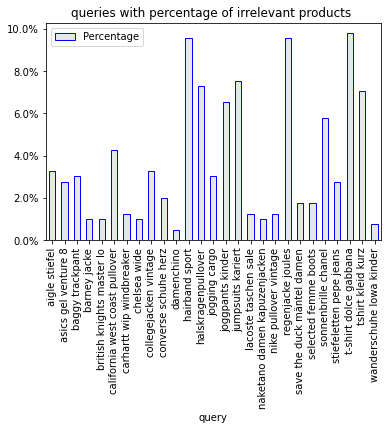

In [8]:
plt.figure(figsize=(15,8))
#data=df.groupby(['query'],as_index=False).agg({'label':pd.Series.sum})
data = df.groupby('query')['label'].sum().reset_index()
data['Percentage'] = 100 * data['label']  / data['label'].sum()
print(data)
ax = data.plot.bar(x='query',y='Percentage',color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.title("queries with percentage of irrelevant products ")

ax.yaxis.set_major_formatter(mtick.PercentFormatter())



In [9]:
# check missing values in variables
df.isnull().sum()

query              0
price_cluster      0
commodity_group    0
product_group      0
silhouette         0
brand              0
color              0
upper_material     0
pattern            0
label              0
dtype: int64

In [10]:
print(df['query'].unique())
print(df['price_cluster'].unique())
#print(df['commodity_group'].unique())
print(df['product_group'].unique())
print(df['silhouette'].unique())
print(df['brand'].unique())
print(df['upper_material'].unique())
print(df['pattern'].unique())

['t-shirt dolce gabbana' 'selected femme boots' 'hairband sport'
 'halskragenpullover' 'stiefeletten pepe jeans' 'barney jacke'
 'chelsea wide' 'california west coast pullover'
 'carhartt wip windbreaker' 'save the duck mäntel damen'
 'collegejacken vintage' 'converse schuhe herz'
 'naketano damen kapuzenjacken' 'sonnenbrille chanel'
 'british knights master lo' 'aigle stiefel' 'asics gel venture 8'
 'tshirt kleid kurz' 'jumpsuits kariert' 'damenchino' 'joggpants kinder'
 'baggy trackpant' 'wanderschuhe lowa kinder' 'regenjacke joules'
 'nike pullover vintage' 'lacoste taschen sale' 'jogging cargo']
['low' 'high' 'entry' 'medium' 'undefined']
['shoe' 'clothing' 'accessoires' 'equipment' 'beauty' 'other' 'underwear'
 'beach_wear' 'nightwear']
['backless_slipper' 'low_shoe' 'sandals' 't_shirt_top' 'trouser' 'belt'
 'ankle_boots' 'coat' 'boots' 'bag' 'sneaker' 'fitness' 'jewellery'
 'beauty_equipment' 'other_equipment' 'gloves' 'headgear'
 'other_accessoires' 'scarf' 'pullover' 'cardigan'

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


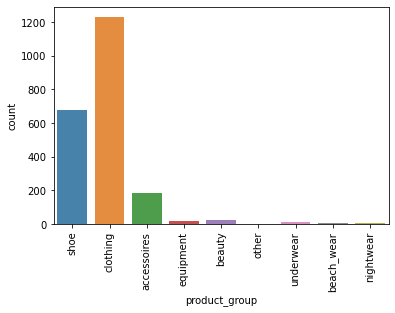

In [11]:
#Distribution of product_group.
sns.countplot(df['product_group'],label="Count",alpha=0.9)
plt.xticks(rotation=90)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


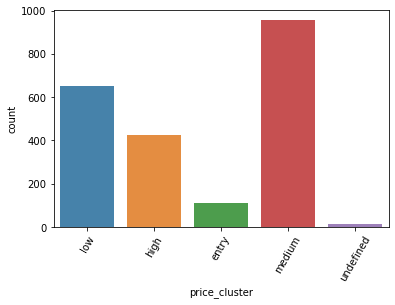

In [12]:
sns.countplot(df['price_cluster'],label="Count",alpha=0.9)
plt.xticks(rotation=60)

plt.show()

In [14]:
#how many product in total.
df.groupby('product_group')['label'].count()

product_group
accessoires     186
beach_wear        6
beauty           25
clothing       1230
equipment        15
nightwear         5
other             1
shoe            679
underwear        13
Name: label, dtype: int64

In [15]:
#How many product are shown to the user wrongly !
df.groupby('product_group')['label'].sum()

product_group
accessoires     38
beach_wear       6
beauty           6
clothing       214
equipment       10
nightwear        3
other            0
shoe           110
underwear       11
Name: label, dtype: int64

# Algorithm

In [16]:
# Becuse the labels are categorical, we apply label encoder to make it numerical.
df_encoded=df.copy() 
label_encoder = preprocessing.LabelEncoder()

values = df_encoded["query"].unique().tolist() # we want to make dictionary with values and keys, 
#to be able to get back to categorical for query.


df_encoded["query"] = label_encoder.fit_transform(df_encoded["query"]).astype('float64')
df_encoded["price_cluster"] = label_encoder.fit_transform(df_encoded["price_cluster"]).astype('float64')
df_encoded["product_group"] = label_encoder.fit_transform(df_encoded["product_group"].apply(str)).astype('float64')
df_encoded["silhouette"] = label_encoder.fit_transform(df_encoded["silhouette"].apply(str)).astype('float64')
df_encoded["brand"] = label_encoder.fit_transform(df_encoded["brand"].apply(str)).astype('float64')
df_encoded["upper_material"] = label_encoder.fit_transform(df_encoded["upper_material"].apply(str)).astype('float64')
df_encoded["pattern"] = label_encoder.fit_transform(df_encoded["pattern"].apply(str)).astype('float64')
df_encoded["color"] = label_encoder.fit_transform(df_encoded["color"].apply(str)).astype('float64')


keys= df_encoded["query"].unique().tolist()

encoded_dic={}

for key,value in zip(keys,values):
    encoded_dic[key] = value


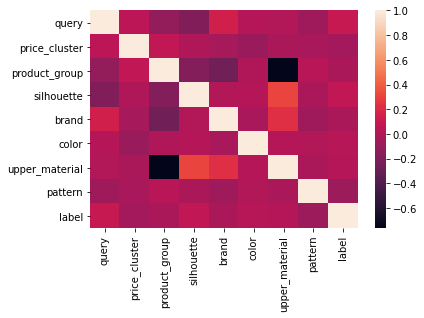

In [32]:
#To see the corralation between featurs
df_encoded = df_encoded[['query','price_cluster','product_group','silhouette','brand','color','upper_material','pattern','label']]
corr = df_encoded.corr(method='pearson')
sns.heatmap(corr)
plt.show()

In [17]:
encoded_dic

{24.0: 't-shirt dolce gabbana',
 21.0: 'selected femme boots',
 11.0: 'hairband sport',
 12.0: 'halskragenpullover',
 23.0: 'stiefeletten pepe jeans',
 3.0: 'barney jacke',
 7.0: 'chelsea wide',
 5.0: 'california west coast pullover',
 6.0: 'carhartt wip windbreaker',
 20.0: 'save the duck mäntel damen',
 8.0: 'collegejacken vintage',
 9.0: 'converse schuhe herz',
 17.0: 'naketano damen kapuzenjacken',
 22.0: 'sonnenbrille chanel',
 4.0: 'british knights master lo',
 0.0: 'aigle stiefel',
 1.0: 'asics gel venture 8',
 25.0: 'tshirt kleid kurz',
 15.0: 'jumpsuits kariert',
 10.0: 'damenchino',
 14.0: 'joggpants kinder',
 2.0: 'baggy trackpant',
 26.0: 'wanderschuhe lowa kinder',
 19.0: 'regenjacke joules',
 18.0: 'nike pullover vintage',
 16.0: 'lacoste taschen sale',
 13.0: 'jogging cargo'}

* Lets run the model with Decision Tree 

In [18]:
feature_cols = ['query','price_cluster','product_group','silhouette','brand','color','upper_material','pattern']
x_features = df_encoded[feature_cols]
y_label = df_encoded['label']
X_train, X_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=100) # 80% training and 20% test

#Building Decision Tree Model
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with 10 decision-trees : 0.9051


Lets run the model with Random forest

In [19]:
'''#Lets run the model with Random forest.
X_train, X_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=1) # 70% training and 30% test
rfc = RandomForestClassifier(n_estimators=40,random_state=0)
# fit the model
rfc.fit(X_train, y_train)
# Predict the Test set results
y_pred = rfc.predict(X_test)
# Check accuracy score 
print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))'''

"#Lets run the model with Random forest.\nX_train, X_test, y_train, y_test = train_test_split(x_features, y_label, test_size=0.2, random_state=1) # 70% training and 30% test\nrfc = RandomForestClassifier(n_estimators=40,random_state=0)\n# fit the model\nrfc.fit(X_train, y_train)\n# Predict the Test set results\ny_pred = rfc.predict(X_test)\n# Check accuracy score \nprint('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))"

# Evaluation

Text(0.5, 48.29999999999998, 'Actual label')

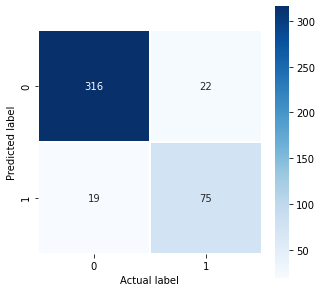

In [20]:
#Confusion matrix.
from sklearn.metrics import classification_report, confusion_matrix#for visualizing tree cm = confusion_matrix(y_train, y_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues',fmt='g')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

In [21]:
#Just a tabel to see the predicted and true label.
y_pred = clf.predict(X_test)
prediction_df = pd.DataFrame(data={'query':X_test["query"], 'new_predictions': y_pred,'truth':y_test})
prediction_df

,query,new_predictions,truth
801,8.0,0,0
1059,22.0,0,0
1237,0.0,0,0
270,12.0,1,1
1720,2.0,0,0
...,...,...,...
625,5.0,0,0
595,5.0,1,1
887,9.0,0,0
1623,14.0,1,1


Dictionary named "results" containing mean accuracy, precision, recall and F1-score over all queries as {'accuracy':value, 'precision':value,...}



In [22]:
results={"Accuracy":metrics.accuracy_score(y_test, y_pred), "precision":metrics.precision_score(y_test, y_pred),
        "recall":metrics.recall_score(y_test, y_pred), "f1-score":metrics.f1_score(y_test, y_pred) }
results



{'Accuracy': 0.9050925925925926,
 'precision': 0.7731958762886598,
 'recall': 0.7978723404255319,
 'f1-score': 0.7853403141361256}

Dictionary named "query_results" containing accuracy, precision, recall and F1-score for each query as {'query1':{'accuracy':value,'precision':value,...},'query2':{...}}


In [23]:
X_test2=X_test.copy()

X_test2 = X_test2.groupby('query')
X_tests={x:X_test2.get_group(x) for x in X_test2.groups}
#print (X_tests)


query_results = []

for q in X_tests.keys():
    y_pred = clf.predict(X_tests[q])
    #X_tests[q].index  
    gt= y_test[X_tests[q].index]
    query_results.append({encoded_dic[q]:{"Accuracy":round(metrics.accuracy_score(gt, y_pred),2), "precision":round(metrics.precision_score(gt, y_pred),2),
        "recall":round(metrics.recall_score(gt, y_pred),2), "f1-score":round(metrics.f1_score(gt, y_pred),2)}})

print(query_results)      

[{'aigle stiefel': {'Accuracy': 0.89, 'precision': 0.75, 'recall': 0.75, 'f1-score': 0.75}}, {'asics gel venture 8': {'Accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}}, {'baggy trackpant': {'Accuracy': 0.84, 'precision': 0.5, 'recall': 1.0, 'f1-score': 0.67}}, {'barney jacke': {'Accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}}, {'british knights master lo': {'Accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}}, {'california west coast pullover': {'Accuracy': 0.87, 'precision': 1.0, 'recall': 0.67, 'f1-score': 0.8}}, {'carhartt wip windbreaker': {'Accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}}, {'chelsea wide': {'Accuracy': 0.92, 'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0}}, {'collegejacken vintage': {'Accuracy': 0.9, 'precision': 0.6, 'recall': 1.0, 'f1-score': 0.75}}, {'converse schuhe herz': {'Accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0}}, {'damenchino': {'Accuracy': 1.0, 'precision': 0.

/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1493: UndefinedMetricWarning: F-score is ill-defined and being set to 0.

In [24]:
X_tests

{0.0:       query  price_cluster  product_group  silhouette  brand  color  \
 1237    0.0            3.0            7.0         0.0   83.0   14.0   
 1251    0.0            3.0            8.0        35.0  136.0    0.0   
 1219    0.0            3.0            7.0         0.0  249.0    2.0   
 1238    0.0            3.0            8.0        35.0  192.0    6.0   
 1272    0.0            1.0            7.0         7.0  251.0   14.0   
 1240    0.0            1.0            7.0         7.0  443.0    2.0   
 1231    0.0            1.0            7.0         7.0  443.0    2.0   
 1229    0.0            0.0            7.0         7.0  116.0   14.0   
 1213    0.0            3.0            8.0        35.0  136.0   14.0   
 1215    0.0            3.0            7.0         0.0  451.0   14.0   
 1254    0.0            2.0            7.0         7.0  283.0   14.0   
 1259    0.0            1.0            7.0         0.0  147.0   14.0   
 1208    0.0            2.0            7.0         7.0  445

In [25]:
#Here we can see the feature importance of the model.
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances


,feature,importance
0,query,0.309
3,silhouette,0.269
4,brand,0.131
1,price_cluster,0.075
2,product_group,0.067
6,upper_material,0.054
7,pattern,0.051
5,color,0.045


(array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

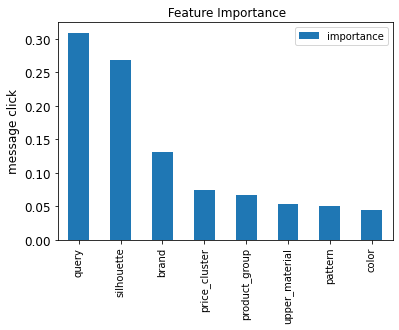

In [26]:
#Plot of faeture importance.
%matplotlib inline
importances.plot(x='feature', kind="bar")
plt.xticks(rotation=30)
plt.title(" Feature Importance")
plt.ylabel('message click', fontsize=12)
plt.xlabel('', fontsize=12)
plt.xticks(fontsize=10,rotation=90)
plt.yticks(fontsize=12)

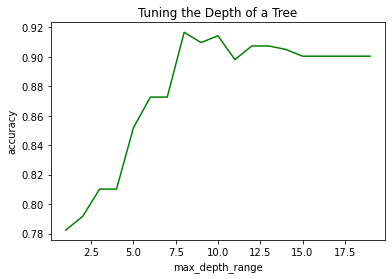

In [27]:
#this plot shows the optimal depth of the tree. 
# List of values to try for max_depth:
max_depth_range = list(range(1, 20))# List to store the average RMSE for each value of max_depth:
accuracy = []

for depth in max_depth_range:
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    
plt.plot(max_depth_range, accuracy,color='g')
plt.xlabel('max_depth_range')
plt.ylabel('accuracy')
plt.title('Tuning the Depth of a Tree')
plt.show()

In [28]:
# let run a gridsearch to see which parameters are optimal for the model.
from sklearn.model_selection import GridSearchCV
param_dic = {"criterion": ['gini','entropy'],
             "max_depth":range(1,20),
             "min_samples_split":range(1,20),
             "min_samples_leaf":range(1,10)}

In [29]:
#Textual reperesntation of tree.
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_0 <= 10.50
|   |--- feature_2 <= 1.50
|   |   |--- class: 1
|   |--- feature_2 >  1.50
|   |   |--- feature_2 <= 7.50
|   |   |   |--- feature_3 <= 35.50
|   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |--- feature_2 <= 5.00
|   |   |   |   |   |   |--- feature_4 <= 461.50
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_4 >  461.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_2 >  5.00
|   |   |   |   |   |   |--- feature_4 <= 72.00
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_4 >  72.00
|   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_0 >  2.50
|   |   |   |   |   |--- feature_4 <= 26.50
|   |   |   |   |   |   |--- feature_0 <= 7.50
|   |   |   |   |   |   |   |--- feature_7 <= 12.00
|   |   |   